In [6]:
using Pkg
Pkg.activate("Project.toml")
Pkg.instantiate()

  Activating project at `c:\Users\zergu\Documents\ut4m-cardio`


In [7]:
using XLSX, DataFrames

In [8]:
# Inclure le fichiers preprocessing.jl qui contient des fonctions permettant de nettoyer la base
include("Julia/preprocessing.jl")
include("Julia/plot.jl")
include("Julia/utils.jl")

plotlinevariabilityinter (generic function with 1 method)

In [ ]:
function format_course_label(course)
    if course == "4_40"
        return "4x40km"
    else
        return string(course) * "km"
    end
end

In [14]:
function build_dataframe(course_name::Any,var_of_interest::Any)
    data = build_data_cardiac("./Ressources/Données complètes UT4M final120419 avec Data cardio.xlsx")
    if course_name == ""
        data_to_plot = data
    else
        data_to_plot = filter(row -> row[:COURSE] == course_name, data)
    end
    if var_of_interest == ""
        return data_to_plot
    else
        data_to_plot = data_to_plot[:,[Symbol(var) for var in var_of_interest]]
        return data_to_plot
    end
end

build_dataframe (generic function with 1 method)

In [18]:
var_of_interest = ["VOL_OGI","VOL_ODI","VTDVGI","VTSVGI","FE2D","STDi","STSi","E/A" ,"E/Ea"]
function custom_summary(df)
    res = df
    desc = describe(res)[:, 1:6]
    var = desc[:, :variable]
    val = desc[:, Not(:variable)]
    
    pourcent = convert.(Int64, round.(((describe(res)[:, 6] / 79) * 100), digits=0))
    pourcent = string.(pourcent)
    pourcent = pourcent .* "%"
    
    statistiques = hcat(var, val)
    rename!(statistiques, :x1 => "Variable")
    statistiques = hcat(statistiques, pourcent)
    rename!(statistiques, Dict(:x1 => "%missing", :mean => "Moyenne", :min => "Minimum", :median => "Médiane", :max => "Maximum", :nmissing => "Nombre de valeurs manquantes"))
    
    return statistiques
end

custom_summary(build_dataframe("", var_of_interest))

Row,Variable,Moyenne,Minimum,Médiane,Maximum,Nombre de valeurs manquantes,%missing
,Symbol,Float64,Real,Float64,Real,Int64,String
1,VOL_OGI,41.1786,24.581,40.1731,73.3696,89,113%
2,VOL_ODI,34.5725,15.1351,33.5367,60.3261,89,113%
3,VTDVGI,61.6169,-0.584795,61.828,91.4894,85,108%
4,VTSVGI,27.5933,-0.584795,27.6699,48.4211,86,109%
5,FE2D,55.7282,40,55.0,71,97,123%
6,STDi,12.6043,7.51351,12.6005,17.6882,89,113%
7,STSi,6.95902,3.45946,6.92537,10.7895,89,113%
8,E/A,1.65579,0.591549,1.64516,3.76923,90,114%
9,E/Ea,4.76811,2.21429,4.45455,10.1,94,119%


In [ ]:
using DataFrames

data = build_dataframe("", var_of_interest)

# Assuming `res` is your DataFrame
desc = describe(data)[:, 1:6]

# Function to round numeric columns and handle missing values
function round_numeric_columns(df, digits=2)
    for col in names(df)
        if eltype(df[!, col]) <: Union{Missing, Number}
            df[!, col] = [ismissing(x) ? missing : round(x, digits=digits) for x in df[!, col]]
        end
    end
    return df
end

rounded_desc = round_numeric_columns(desc)

Row,variable,mean,min,median,max,nmissing
,Symbol,Union…,Union…,Union…,Union…,Float64
1,CODE_SUJET,40.0,1,40.0,79,0.0
2,COURSE,,,,,0.0
3,TIME,3.8,-2,3.0,11,0.0
4,STDi,12.6043,7.51351,12.6005,17.6882,89.0
5,DTDVGI,28.0527,21.8447,27.9188,35.5828,90.0
6,At,26.245,12,25.0,76,97.0
7,TDM,208.748,121,206.0,370,90.0
8,PP,9.48852,7,9.0,13,90.0
9,VOL_OGI,41.1786,24.581,40.1731,73.3696,89.0


In [13]:
data = build_all_data("Ressources/Données complètes UT4M final120419 avec Data cardio.xlsx")
count_non_participants(data)

Row,COURSE,HDA
,Any,Int64
1,100km,0
2,4x40km,0
3,40km,0
4,160km,0


In [ ]:
data = build_data_cardiac("./Ressources/Données complètes UT4M final120419 avec Data cardio.xlsx")
custom_summary(data)

Row,variable,mean,min,median,max,nmissing,%missing
,Symbol,Union…,Union…,Union…,Union…,Int64,String
1,CODE_SUJET,40.0,1,40.0,79,0,0%
2,COURSE,,,,,0,0%
3,TIME,3.8,-2,3.0,11,0,0%
4,STDi,12.6043,7.51351,12.6005,17.6882,89,23%
5,DTDVGI,28.0527,21.8447,27.9188,35.5828,90,23%
6,At,26.245,12,25.0,76,97,25%
7,TDM,208.748,121,206.0,370,90,23%
8,PP,9.48852,7,9.0,13,90,23%
9,VOL_OGI,41.1786,24.581,40.1731,73.3696,89,23%


In [36]:
vcat([:CODE_SUJET, :COURSE, :TIME], var_of_interest)

12-element Vector{Any}:
 :CODE_SUJET
 :COURSE
 :TIME
 "VOL_OGI"
 "VOL_ODI"
 "VTDVGI"
 "VTSVGI"
 "FE2D"
 "STDi"
 "STSi"
 "E/A"
 "E/Ea"

In [25]:
function missing_values_1D(df, dim1, dims = [:CODE_SUJET, :COURSE, :TIME])
    res = df
    filter!(x -> x != dim1, dims)
    grouped = groupby(res[:,Not(dims)], dim1)
    cols = names(res[:,Not(dims)]) .!= String(dim1)
    nmissing_per_group = DataFrames.combine(grouped, 
    [col => (x -> sum(ismissing, x)) => Symbol(string(col)) for col in names(res[:,Not(dims)]) if col != String(dim1)]...)
    return nmissing_per_group
end

missing_values_1D (generic function with 2 methods)

In [57]:
function plotlinevariabilityinter(df, col)
    grouped = groupby(df[:, 1:end], [:COURSE, :TIME])
    result = DataFrames.combine(grouped, DataFrames.names(df, Not([:CODE_SUJET, :COURSE, :TIME])) .=> mean_std)
    col2 = col * "_mean_std"
    res = Base.hcat(result[:, 1:2], Base.getindex.(result[:, Symbol(col2)], 1), makeunique=true)
    grouped = groupby(res, :TIME)
    mean_values = DataFrames.combine(grouped, :x1 => (x -> Statistics.mean(skipmissing(x))) => Symbol("mean_" * col))
    x = ["J-2", "J+1", "J+3", "J+6", "J+11"]
    C1 = first.(filter(row -> row.COURSE == 100, res)[:, "x1"])
    C2 = first.(filter(row -> row.COURSE == "4_40", res)[:, "x1"])
    C3 = first.(filter(row -> row.COURSE == 160, res)[:, "x1"])
    C4 = first.(filter(row -> row.COURSE == 40, res)[:, "x1"])
    Mean = mean_values[:, 2]
    p = Plots.plot(x, [C1 C2 C3 C4], label=["100km" "4x40km" "160km" "40km"], title="Variabilité inter-individuelle pour " * col)
    # Ajout de la cinquième courbe avec couleur spécifique et style en pointillé
    return plot!(p, x, Mean, label="Moyenne", linecolor=:black, linestyle=:dash, legend=:outerbottom, legendcolumns=5)
end

plotlinevariabilityinter (generic function with 1 method)

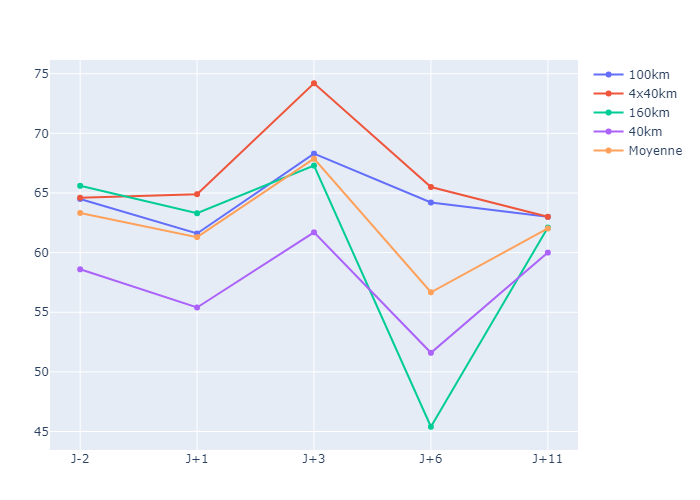

In [90]:
one_var = "VTDVGI"
plotlinevariabilityinter(data, one_var)

In [89]:
function plotlinevariabilityinter(df, col)
    grouped = groupby(df[:, 1:end], [:COURSE, :TIME])
    res = combine(grouped, names(df, Not([:CODE_SUJET, :COURSE, :TIME])) .=> mean_std)
    col2 = col * "_mean_std"
    res = hcat(res[:, 1:2], Base.getindex.(res[:, Symbol(col2)], 1), makeunique=true)
    grouped = groupby(res, :TIME)
    mean_values = combine(grouped, :x1 => (x -> mean(skipmissing(x))) => Symbol("mean_" * col))
    x = ["J-2", "J+1", "J+3", "J+6", "J+11"]
    C1 = first.(filter(row -> row.COURSE == 100, res)[:, "x1"])
    C2 = first.(filter(row -> row.COURSE == "4_40", res)[:, "x1"])
    C3 = first.(filter(row -> row.COURSE == 160, res)[:, "x1"])
    C4 = first.(filter(row -> row.COURSE == 40, res)[:, "x1"])
    Mean = mean_values[:, 2]

    trace1 = PlotlyJS.scatter(x=x, y=C1, mode="lines+markers", name="100km")
    trace2 = PlotlyJS.scatter(x=x, y=C2, mode="lines+markers", name="4x40km")
    trace3 = PlotlyJS.scatter(x=x, y=C3, mode="lines+markers", name="160km")
    trace4 = PlotlyJS.scatter(x=x, y=C4, mode="lines+markers", name="40km")
    trace_mean = PlotlyJS.scatter(x=x, y=Mean, mode="lines+markers", name="Moyenne")

    return PlotlyJS.plot([trace1, trace2, trace3, trace4, trace_mean])
end

plotlinevariabilityinter (generic function with 1 method)

In [73]:
data = build_dataframe("", vcat(["TIME", "COURSE", "CODE_SUJET"], var_of_interest))
col = "VTDVGI"
grouped = groupby(data[:, 1:end], [:COURSE, :TIME])
res = combine(grouped, names(data, Not([:CODE_SUJET, :COURSE, :TIME])) .=> mean_std)
col2 = col * "_mean_std"
res = hcat(res[:, 1:2], Base.getindex.(res[:, Symbol(col2)], 1), makeunique=true)
grouped = groupby(res, :TIME)
mean_values = combine(grouped, :x1 => (x -> mean(skipmissing(x))) => Symbol("mean_" * col))

Row,TIME,mean_VTDVGI
,Int64,Float64
1,-2,63.325
2,1,61.3
3,3,67.875
4,6,56.675
5,11,62.025


In [ ]:
x = ["J-2", "J+1", "J+3", "J+6", "J+11"]
C1 = first.(filter(row -> row.COURSE == 100, res)[:, "x1"])
C2 = first.(filter(row -> row.COURSE == "4_40", res)[:, "x1"])
C3 = first.(filter(row -> row.COURSE == 160, res)[:, "x1"])
C4 = first.(filter(row -> row.COURSE == 40, res)[:, "x1"])
Mean = mean_values[:, 2]

trace1 = scatter(x=x, y=C1, mode="lines+markers", name="100km")
trace2 = scatter(x=x, y=C2, mode="lines+markers", name="4x40km")
trace3 = scatter(x=x, y=C3, mode="lines+markers", name="160km")
trace4 = scatter(x=x, y=C4, mode="lines+markers", name="40km")
trace_mean = scatter(x=x, y=Mean, mode="lines+markers", name="Moyenne")
plot([trace1, trace2, trace3, trace4, trace_mean])

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)
The function `getindex` exists, but no method is defined for this combination of argument types.

In [84]:
PlotlyJS.plot([trace1, trace2, trace3, trace4, trace_mean])

MethodError: MethodError: no method matching Plot(::Vector{Plots.Plot{Plots.GRBackend}})
The type `Plot` exists, but no method is defined for this combination of argument types when trying to construct it.

Closest candidates are:
  Plot(!Matched::Plot)
   @ PlotlyBase C:\Users\zergu\.julia\packages\PlotlyBase\4NWbR\src\PlotlyBase.jl:87
  Plot(!Matched::AbstractDataFrame, !Matched::Symbol, !Matched::Layout; kwargs...)
   @ PlotlyBase C:\Users\zergu\.julia\packages\PlotlyBase\4NWbR\src\dataframes_api.jl:496
  Plot(!Matched::AbstractDataFrame, !Matched::Symbol; ...)
   @ PlotlyBase C:\Users\zergu\.julia\packages\PlotlyBase\4NWbR\src\dataframes_api.jl:496
  ...


In [70]:
plotlinevariabilityinter(data, one_var)

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)
The function `getindex` exists, but no method is defined for this combination of argument types.